Question 2d

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_data = np.genfromtxt("hw5_train.csv", delimiter=',')
X_train = np.asarray(train_data[:,:2])
y_train = train_data[:, 2]
y_train = np.where(y_train == 0, -1, y_train)

test_data = np.genfromtxt("hw5_test.csv", delimiter=',')
X_test = np.asarray(test_data[:,:2])
y_test = test_data[:, 2]
y_test = np.where(y_test == 0, -1, y_test)

In [7]:
def plotDecBoundaries_Nonlinear(feature, labels, d, l):
    fsize = (6, 4)
    legend_on = False

    # this function is from Prof. Chugg's PlotNonLinear.py script
    # https://github.com/keithchugg/ee559_spring2023/blob/main/hw_helpers/PlotNonlinear.py
    '''
    Plot the decision boundaries and data points for any binary classifiers
    
    feature: origianl2D feautre, N x 2 array:
        N: number of data points
        2: number of features 
    labels: class lables correspond to feature, N x 1 array: [0,0,1,1,0,0,...]
        N: number of data points
    legend_on: add the legend in the plot. potentially slower for datasets with large number of clases and data points
    ----------------------------
    You need to write the following two functions

    non_linear_trans: your custom non-linear transforation function.
        <feature_nonlinear> = non_linear_trans(<feature_original>), 
            Input: <feature_original>, Nx2 array, 
            Output: <feature_nonlinear>: Nx? array.
        if no nonlinear transformation performs, then, 
        let non_linear_trans = lambda x:x, which just output your original feature
    
    predictor: your custom predictor.
        <predictions> = predictor(<feature>)
            Input: <feature> Nx? array.
            Output: <predictions> binary labels, i.e., array ([0,1,0,0,1...])

    If you don't want write custom functions, you can modify this plot function based on your need,
    do non-linear transformation and class prediction inside this plot function.
    ----------------------------
    '''

    labels = labels.astype(int)

    # Set the feature range for ploting
    max_x = np.ceil(max(feature[:, 0])) + 1
    min_x = np.floor(min(feature[:, 0])) - 1
    max_y = np.ceil(max(feature[:, 1])) + 1
    min_y = np.floor(min(feature[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    # make (x,y) pairs as a bunch of row vectors.
    xy = np.hstack((x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')))

    '''
    You should write the custom functions, non_linear_trans and predictor
    '''
    # apply non-linear transformation to all points in the map (not only data points)
    poly_features = PolynomialFeatures(degree=d)
    xy = poly_features.fit_transform(xy)
    xy = xy

    # predict the class of all points in the map
    poly_features = PolynomialFeatures(degree=d)
    X_train_poly = poly_features.fit_transform(X_train)
    lin_reg = Ridge(alpha=l)
    lin_reg.fit(X_train_poly, y_train)

    y_train_pred = np.where(lin_reg.predict(xy) > 0, 1, 0)
    pred_label = y_train_pred

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd', 'gp', 'y*', 'kx', 'gP', 'r+', 'bh'])
    # show the image, give each coordinate a color according to its class label
    plt.figure(figsize=fsize)

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower', aspect='auto')

    # plot the class data.
    plot_index = 0
    class_list = []
    class_list_name = []  # for legend
    for cur_label in np.unique(labels):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(feature[labels == cur_label, 0], feature[labels == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class '+str(plot_index))
            l = plt.legend(class_list, class_list_name, loc=2)
            plt.gca().add_artist(l)

        plot_index = plot_index + 1

    plt.show()

Lambda: 0.3
Degree: 1
Train Accuracy = 80.0 %
Train data J value 0.8
Test Accuracy = 77.0 %

Lambda: 0.3
Degree: 2
Train Accuracy = 88.33333333333333 %
Train data J value 0.4666666666666667
Test Accuracy = 85.0 %

Lambda: 0.3
Degree: 3
Train Accuracy = 88.33333333333333 %
Train data J value 0.4666666666666667
Test Accuracy = 83.5 %

Lambda: 0.3
Degree: 4
Train Accuracy = 91.66666666666666 %
Train data J value 0.3333333333333333
Test Accuracy = 82.5 %

Lambda: 0.3
Degree: 5
Train Accuracy = 90.0 %
Train data J value 0.4
Test Accuracy = 80.5 %

Lambda: 0.3
Degree: 6
Train Accuracy = 95.0 %
Train data J value 0.2
Test Accuracy = 82.5 %

Lambda: 0.3
Degree: 7
Train Accuracy = 95.0 %
Train data J value 0.2
Test Accuracy = 75.0 %



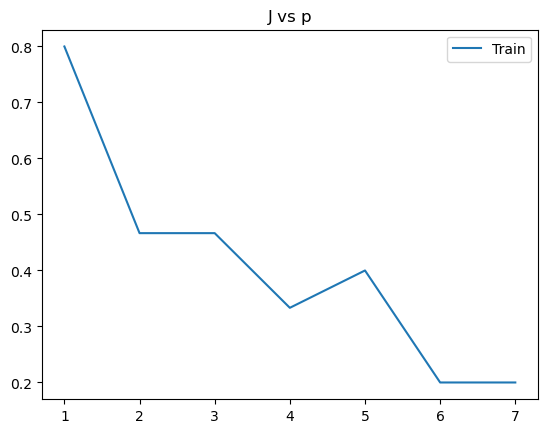

The Accuracy plot for lambda = 0.3


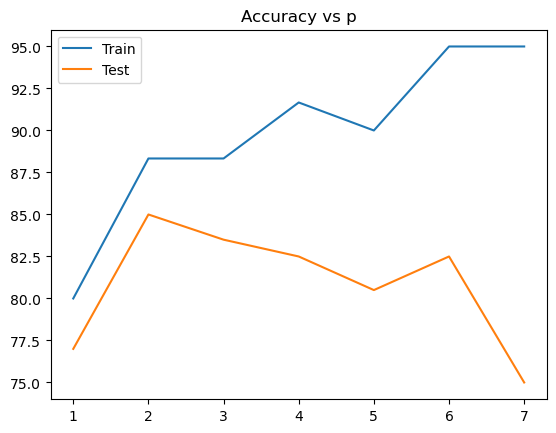

Lambda: 1
Degree: 1
Train Accuracy = 80.0 %
Train data J value 0.8
Test Accuracy = 78.0 %

The Decision boundary plot for p = 1 and lambda = 1


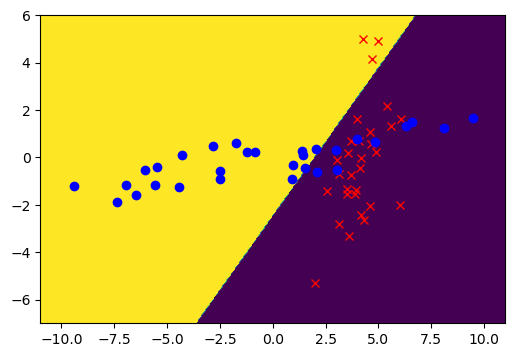

Lambda: 1
Degree: 2
Train Accuracy = 88.33333333333333 %
Train data J value 0.4666666666666667
Test Accuracy = 85.0 %

The Decision boundary plot for p = 2 and lambda = 1


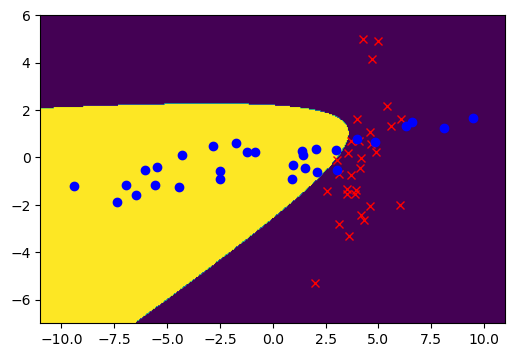

Lambda: 1
Degree: 3
Train Accuracy = 88.33333333333333 %
Train data J value 0.4666666666666667
Test Accuracy = 83.0 %

Lambda: 1
Degree: 4
Train Accuracy = 91.66666666666666 %
Train data J value 0.3333333333333333
Test Accuracy = 82.5 %

The Decision boundary plot for p = 4 and lambda = 1


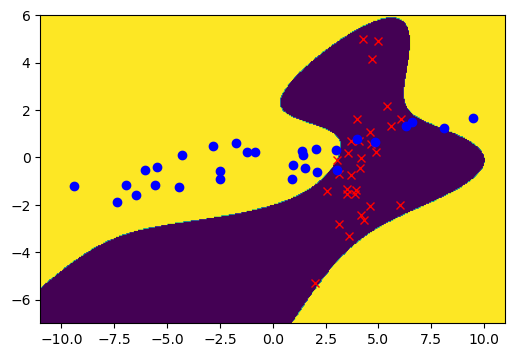

Lambda: 1
Degree: 5
Train Accuracy = 90.0 %
Train data J value 0.4
Test Accuracy = 82.0 %

Lambda: 1
Degree: 6
Train Accuracy = 95.0 %
Train data J value 0.2
Test Accuracy = 80.5 %

Lambda: 1
Degree: 7
Train Accuracy = 95.0 %
Train data J value 0.2
Test Accuracy = 76.0 %

The Decision boundary plot for p = 7 and lambda = 1


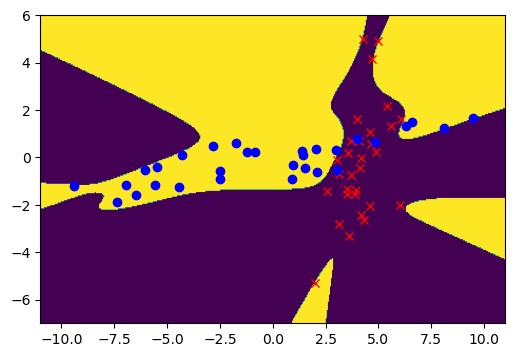

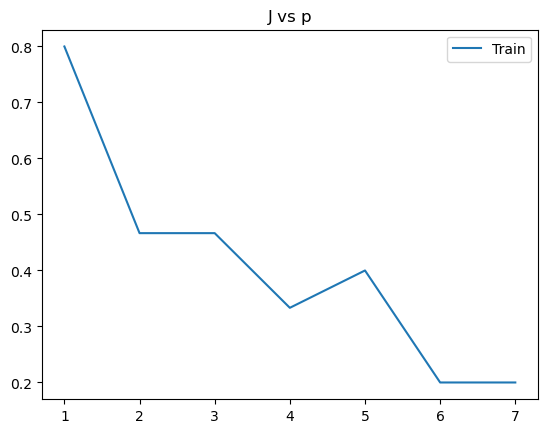

The Accuracy plot for lambda = 1


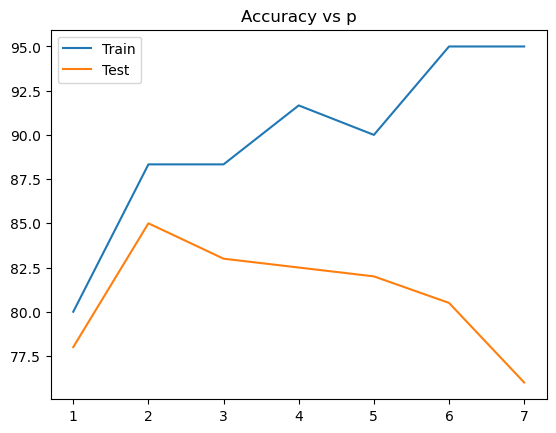

Lambda: 3
Degree: 1
Train Accuracy = 80.0 %
Train data J value 0.8
Test Accuracy = 78.0 %

Lambda: 3
Degree: 2
Train Accuracy = 88.33333333333333 %
Train data J value 0.4666666666666667
Test Accuracy = 84.5 %

Lambda: 3
Degree: 3
Train Accuracy = 88.33333333333333 %
Train data J value 0.4666666666666667
Test Accuracy = 83.0 %

Lambda: 3
Degree: 4
Train Accuracy = 90.0 %
Train data J value 0.4
Test Accuracy = 83.5 %

Lambda: 3
Degree: 5
Train Accuracy = 90.0 %
Train data J value 0.4
Test Accuracy = 81.0 %

Lambda: 3
Degree: 6
Train Accuracy = 93.33333333333333 %
Train data J value 0.26666666666666666
Test Accuracy = 80.0 %

Lambda: 3
Degree: 7
Train Accuracy = 95.0 %
Train data J value 0.2
Test Accuracy = 78.0 %



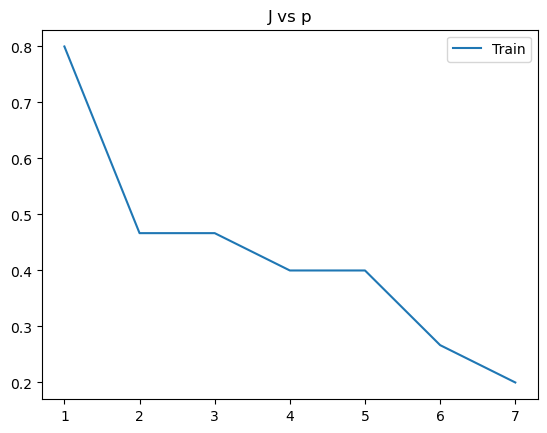

The Accuracy plot for lambda = 3


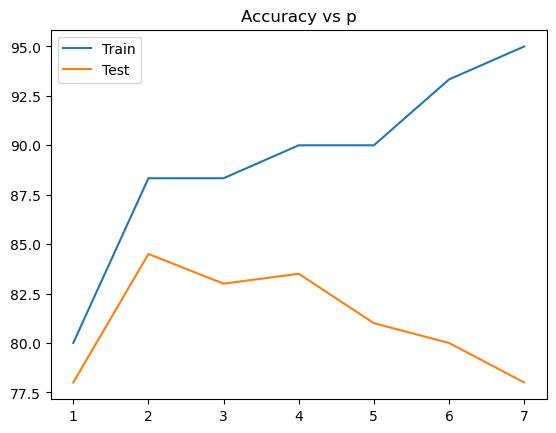

Lambda: 10
Degree: 1
Train Accuracy = 76.66666666666667 %
Train data J value 0.9333333333333333
Test Accuracy = 79.0 %

The Decision boundary plot for p = 1 and lambda = 10


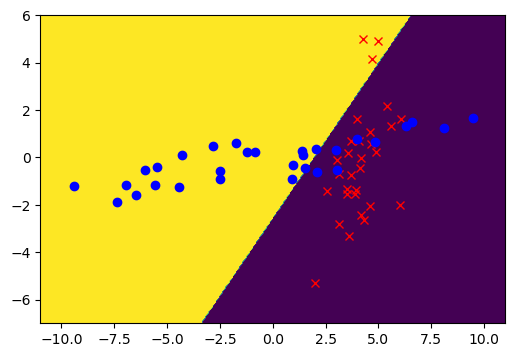

Lambda: 10
Degree: 2
Train Accuracy = 85.0 %
Train data J value 0.6
Test Accuracy = 82.5 %

The Decision boundary plot for p = 2 and lambda = 10


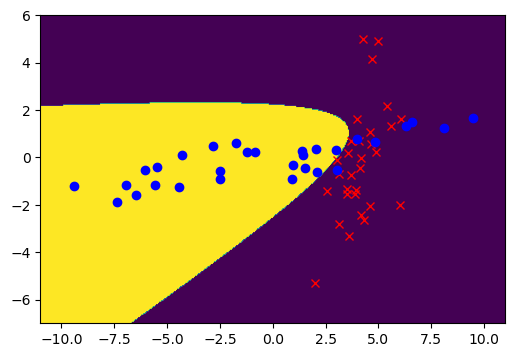

Lambda: 10
Degree: 3
Train Accuracy = 85.0 %
Train data J value 0.6
Test Accuracy = 81.0 %

Lambda: 10
Degree: 4
Train Accuracy = 88.33333333333333 %
Train data J value 0.4666666666666667
Test Accuracy = 83.0 %

The Decision boundary plot for p = 4 and lambda = 10


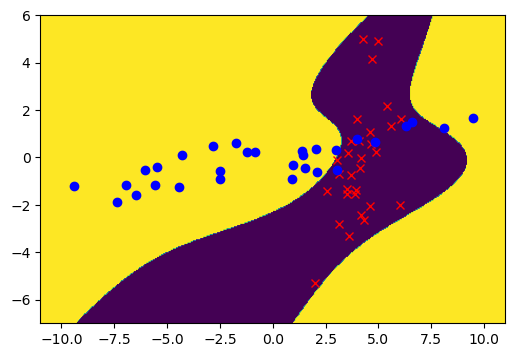

Lambda: 10
Degree: 5
Train Accuracy = 90.0 %
Train data J value 0.4
Test Accuracy = 81.0 %

Lambda: 10
Degree: 6
Train Accuracy = 93.33333333333333 %
Train data J value 0.26666666666666666
Test Accuracy = 79.0 %

Lambda: 10
Degree: 7
Train Accuracy = 95.0 %
Train data J value 0.2
Test Accuracy = 82.0 %

The Decision boundary plot for p = 7 and lambda = 10


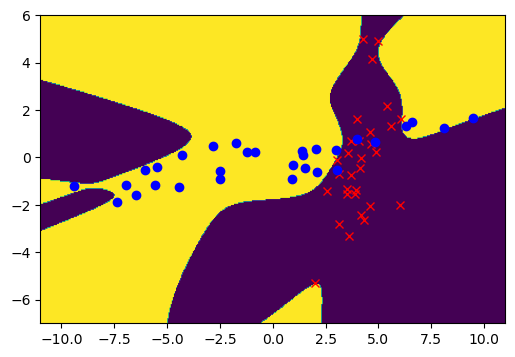

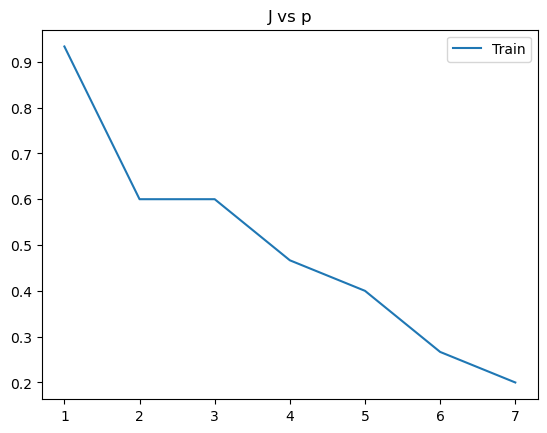

The Accuracy plot for lambda = 10


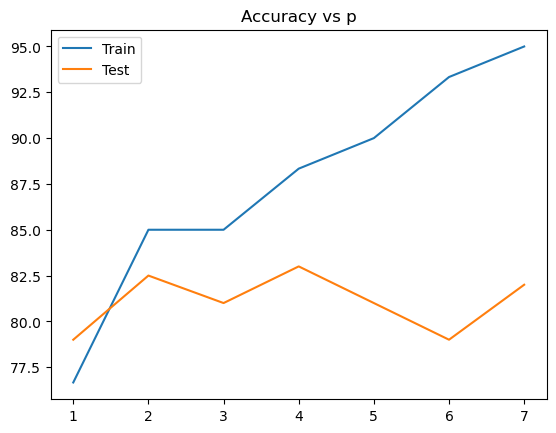

Lambda: 30
Degree: 1
Train Accuracy = 76.66666666666667 %
Train data J value 0.9333333333333333
Test Accuracy = 80.0 %

Lambda: 30
Degree: 2
Train Accuracy = 80.0 %
Train data J value 0.8
Test Accuracy = 80.0 %

Lambda: 30
Degree: 3
Train Accuracy = 81.66666666666667 %
Train data J value 0.7333333333333333
Test Accuracy = 79.0 %

Lambda: 30
Degree: 4
Train Accuracy = 83.33333333333334 %
Train data J value 0.6666666666666666
Test Accuracy = 81.5 %

Lambda: 30
Degree: 5
Train Accuracy = 86.66666666666667 %
Train data J value 0.5333333333333333
Test Accuracy = 79.5 %

Lambda: 30
Degree: 6
Train Accuracy = 91.66666666666666 %
Train data J value 0.3333333333333333
Test Accuracy = 77.5 %

Lambda: 30
Degree: 7
Train Accuracy = 95.0 %
Train data J value 0.2
Test Accuracy = 81.5 %



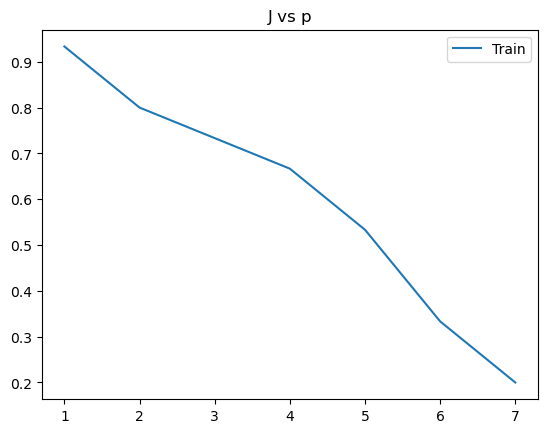

The Accuracy plot for lambda = 30


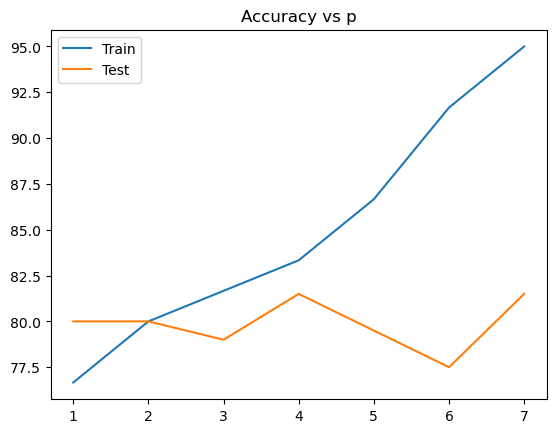

Lambda: 100
Degree: 1
Train Accuracy = 75.0 %
Train data J value 1.0
Test Accuracy = 76.5 %

The Decision boundary plot for p = 1 and lambda = 100


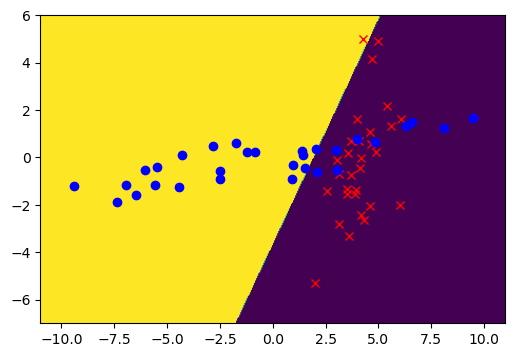

Lambda: 100
Degree: 2
Train Accuracy = 76.66666666666667 %
Train data J value 0.9333333333333333
Test Accuracy = 76.5 %

The Decision boundary plot for p = 2 and lambda = 100


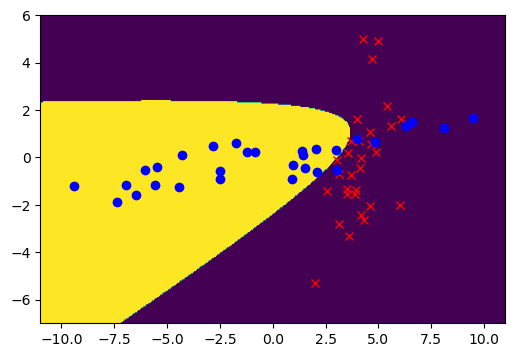

Lambda: 100
Degree: 3
Train Accuracy = 80.0 %
Train data J value 0.8
Test Accuracy = 78.5 %

Lambda: 100
Degree: 4
Train Accuracy = 80.0 %
Train data J value 0.8
Test Accuracy = 77.5 %

The Decision boundary plot for p = 4 and lambda = 100


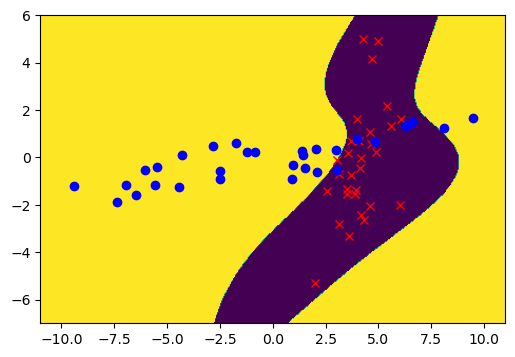

Lambda: 100
Degree: 5
Train Accuracy = 80.0 %
Train data J value 0.8
Test Accuracy = 76.5 %

Lambda: 100
Degree: 6
Train Accuracy = 86.66666666666667 %
Train data J value 0.5333333333333333
Test Accuracy = 75.0 %

Lambda: 100
Degree: 7
Train Accuracy = 93.33333333333333 %
Train data J value 0.26666666666666666
Test Accuracy = 82.5 %

The Decision boundary plot for p = 7 and lambda = 100


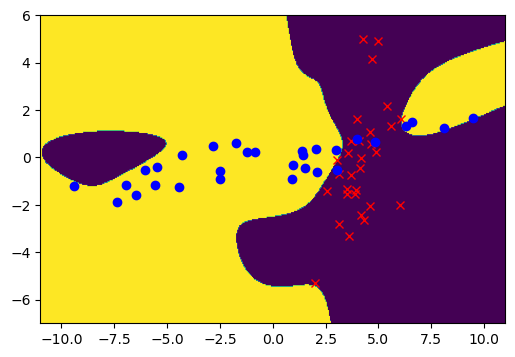

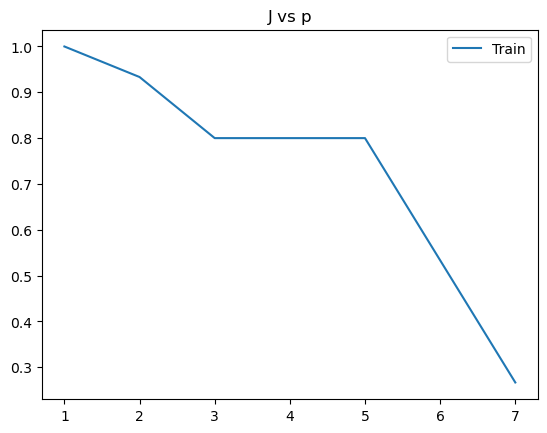

The Accuracy plot for lambda = 100


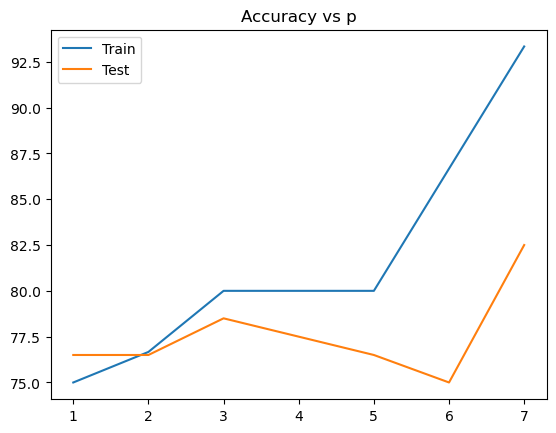

In [8]:
lam = [0.3, 1, 3, 10, 30, 100]
degrees = [1, 2, 3, 4, 5, 6, 7]

for l in lam:
    train_acc = []
    test_acc = []
    train_J = []
    for degree in degrees:
        print("Lambda:",l)
        print("Degree:", degree)
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        lin_reg = Ridge(alpha=l, fit_intercept=False)
        lin_reg.fit(X_train_poly, y_train)

        y_train_pred = np.where(lin_reg.predict(X_train_poly) > 0, 1, -1)
        mse_train = mean_squared_error(y_train, y_train_pred)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        print("Train Accuracy =", train_accuracy*100, "%")
        print("Train data J value", mse_train)

        y_test_pred = np.where(lin_reg.predict(X_test_poly) > 0, 1, -1)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print("Test Accuracy =", test_accuracy*100, "%")
        print()

        train_acc.append(train_accuracy*100)
        train_J.append(mse_train)
        test_acc.append(test_accuracy*100)

        if (l == 1 or l == 10 or l == 100) and (degree == 1 or degree == 2 or degree == 4 or degree == 7):
            print("The Decision boundary plot for p =", degree, "and lambda =", l)
            plotDecBoundaries_Nonlinear(X_train, y_train, degree, l)

    plt.title("J vs p")
    plt.plot(degrees, train_J, label='Train')
    plt.legend()
    plt.show()

    print("The Accuracy plot for lambda =", l)
    plt.title("Accuracy vs p")
    plt.plot(degrees, train_acc, label='Train')
    plt.plot(degrees, test_acc, label='Test')
    plt.legend()
    plt.show()